In [1]:
#import machine learning essentials
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import model_selection
import seaborn as sns  # Python visualization library based on matplotlib provides a high-level interface for drawing attractive statistical graphics
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt  # For graphical representation
import time

from sklearn import linear_model
#warnings
import warnings
warnings.filterwarnings('ignore')

# Import ML modules
sns.set_style('darkgrid')


In [2]:
# Data acquisition: load csv
df = pd.DataFrame(pd.read_csv('Data/Obfuscated-MalMem2022.csv'))
# Unlock pandas power (yeah!!!)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


In [3]:
# 1.Column Category is unnecessary for this study as we will simply be looking at classifications
df.drop('Category', axis=1, inplace=True)
# df.reset_index(drop=True, inplace=True)
print("dropped Category")


dropped Category


In [4]:
#describe data
df.describe()

pslist.nproc  pslist.nppid  pslist.avg_threads  pslist.nprocs64bit  \
count  58596.000000  58596.000000        58596.000000             58596.0   
mean      41.394771     14.713837           11.341655                 0.0   
std        5.777249      2.656748            1.588231                 0.0   
min       21.000000      8.000000            1.650000                 0.0   
25%       40.000000     12.000000            9.972973                 0.0   
50%       41.000000     15.000000           11.000000                 0.0   
75%       43.000000     16.000000           12.861955                 0.0   
max      240.000000     72.000000           16.818182                 0.0   

       pslist.avg_handlers  dlllist.ndlls  dlllist.avg_dlls_per_proc  \
count         58596.000000   58596.000000               58596.000000   
mean            247.509819    1810.805447                  43.707806   
std             111.857790     329.782639                   5.742023   
min              34.962500     670.000000                   7.333333   
25%             208.725000    1556.000000                  38.833333   
50%             243.963710    1735.000000                  42.781524   
75%             289.974322    2087.000000                  49.605280   
max           24845.951220    3443.000000                  53.170732   

       handles.nhandles  handles.avg_handles_per_proc  handles.nport  \
count      5.859600e+04                  58596.000000        58596.0   
mean       1.025858e+04                    249.560958            0.0   
std        4.866864e+03                    145.999866            0.0   
min        3.514000e+03                     71.139241            0.0   
25%        8.393000e+03                    209.648228            0.0   
50%        9.287500e+03                    247.208951            0.0   
75%        1.219300e+04                    291.355050            0.0   
max        1.047310e+06                  33784.193550            0.0   

       handles.nfile  handles.nevent  handles.ndesktop  handles.nkey  \
count   58596.000000    58596.000000      58596.000000  58596.000000   
mean      899.119513     3572.409960         44.529166    774.280668   
std      3432.351200      805.460522          5.161254    150.407075   
min       266.000000      966.000000         22.000000    284.000000   
25%       646.000000     2923.000000         43.000000    675.000000   
50%       839.000000     3151.000000         45.000000    753.000000   
75%      1080.000000     4321.000000         46.000000    859.000000   
max    807008.000000     7892.000000        159.000000   2668.000000   

       handles.nthread  handles.ndirectory  handles.nsemaphore  \
count     58596.000000        58596.000000        58596.000000   
mean        928.510086          102.398338          683.339324   
std         237.817566            9.782695           94.531078   
min         388.000000           57.000000          296.000000   
25%         708.000000           99.000000          614.000000   
50%         848.000000          103.000000          684.000000   
75%        1169.000000          107.000000          750.000000   
max        5637.000000          498.000000         4268.000000   

       handles.ntimer  handles.nsection  handles.nmutant  \
count    58596.000000      58596.000000     58596.000000   
mean       130.327855        290.127466       312.588829   
std         14.965266        144.278832        73.173189   
min         69.000000         50.000000       118.000000   
25%        120.000000        177.000000       258.000000   
50%        131.000000        224.000000       289.000000   
75%        142.000000        415.000000       366.000000   
max        382.000000      14687.000000       583.000000   

       ldrmodules.not_in_load  ldrmodules.not_in_init  ldrmodules.not_in_mem  \
count            58596.000000            58596.000000           58596.000000   
mean                60.830347               99.946413              60.

In [5]:
# Seperating the targets from the features.
# select all features but target
X = df.drop('Class', axis=1)
# select only target
y = df["Class"]


In [6]:
#drop columns with no standard deviation of 0
X = X.drop(labels=X.loc[:, X.std() == 0].columns, axis=1)

In [7]:
# Tester function
def predict(clf, X_test, y_test):
    #Start time prediction
    start = time.time()
    #predict
    y_pred = clf.predict(X_test)
    #End time prediction
    end = time.time()

    prediction_time = (end - start)

    #accuracy
    acc = accuracy_score(y_test, y_pred)
    # #confusion matrix
    # cm = confusion_matrix(y_test, y_pred)
    # #classification report
    # cr = classification_report(y_test, y_pred)

    
    return {"Test Accuracy":acc, 
            "Test Prediction Time":prediction_time, 
            "Test Prediction Time/Sample":(prediction_time/X_test.shape[0])}

In [8]:
#Modeling
def Cross_val(clf, X_train, y_train, X_test, y_test):
    #score cross validation
    score = ['accuracy', 'precision_weighted', 'recall_weighted', 'f1_macro']
    #cross validation
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_validate(
        clf, X_train, y_train, cv=kfold, scoring=score, n_jobs=-1)

    clf = clf.fit(X_train, y_train)

    test_data = predict(clf, X_test, y_test)

    return {"Accuracy": (cv_results['test_accuracy'].mean()).round(4),
            "Train Sample": y_train.shape[0],
            "Average Training Time": cv_results['fit_time'].mean(),
            "Average Score Time": cv_results['score_time'].mean()}, predict(clf, X_test, y_test)


In [9]:
# Stacked Ensemble Classifier
def stacked_ensemble(X_new, y_local):
    
    test_size = 0.50
    seed = 42
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X_new, y_local, test_size=test_size, random_state=seed,)
    
    # prepare estimators
    estimators = [
        ('RF', RandomForestClassifier()),
        ('CART', DecisionTreeClassifier()),
        ('NB', GaussianNB())
    ]

    # create the ensemble model
    ensemble = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
    # fit the model on all available 
    
    train_data, test_data = Cross_val(ensemble, X_train, y_train, X_test, y_test)
    
    return train_data, test_data


In [10]:
# Correlation Coefficient
def correlation_coeffiecient(X_in, y):
    #correlation coefficient
    corr_matrix = X_in.corr()
    upper_tri = corr_matrix.where(
        np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
        
    # plot correlation matrix
    sns.heatmap(X.corr(), annot=True, cmap='coolwarm', square=True, fmt='.2f', annot_kws={'size': 25})
    his = plt.gcf()
    his.set_size_inches(100, 100)
    plt.show()

    #threshold
    threshold = 0.72

    #drop columns with correlation above threshold
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    X_new = X_in.drop(to_drop, axis=1)

    # plot correlation matrix
    sns.heatmap(X_new.corr(), annot=True, cmap='coolwarm',
                square=True, fmt='.2f', annot_kws={'size': 25})
    his = plt.gcf()
    his.set_size_inches(100, 100)
    plt.show()

    print(X_new.columns)


    return X_new


In [11]:
#Information Gain
def mutual_info(X_mi, y):
    #mutual info
    mi = mutual_info_classif(X_mi, y)
    mi = pd.Series(mi)
    mi.index = X_mi.columns
    mi.sort_values(ascending=False, inplace=True)
    mi.plot.bar(figsize=(25, 10))
    plt.show()

    #threshold
    threshold = 0.6

    #drop columns with mutual info below threshold
    to_drop = [column for column in mi.index if mi[column] < threshold]

    X_mi = X_mi.drop(to_drop, axis=1)

    print(X_mi.columns)

    # mi2 = mutual_info_classif(X_mi, y)
    # mi2 = pd.Series(mi2)
    # mi2.index = X_mi.columns
    # mi2.sort_values(ascending=False, inplace=True)
    # mi2.plot.bar(figsize=(25, 10))
    # plt.show()

    return X_mi


In [12]:
#variance threshold    
def variance_threshold(X_var, y_train):
    #variance threshold plot
    plt.figure(figsize=(100, 6))
    plt.title('Variance of Features')
    plt.xlabel('Features')
    plt.ylabel('Variance')
    plt.plot(X_var.var(axis=0))
    plt.show()

    selector = VarianceThreshold(threshold=351.93)
    selector.fit(X_var)
    
    cols = selector.get_support(indices=True)
    columns = X_var.columns[cols]
    X_var = pd.DataFrame(data=X_var.iloc[:, cols], columns=columns)

    #variance threshold plot
    X_var.var(axis=0)
    # plt.figure(figsize=(20, 6))
    # plt.title('Variance of Features')
    # plt.xlabel('Features')
    # plt.ylabel('Variance')
    # plt.plot(X_var.var(axis=0))
    # plt.show()

    print(X_var.columns)
    
    return X_var


In [13]:
#feature selection map
feature_selection_map = {
    'corr_threshold': correlation_coeffiecient,
    'var_threshold': variance_threshold,
     'info_gain_ratio': mutual_info,
}


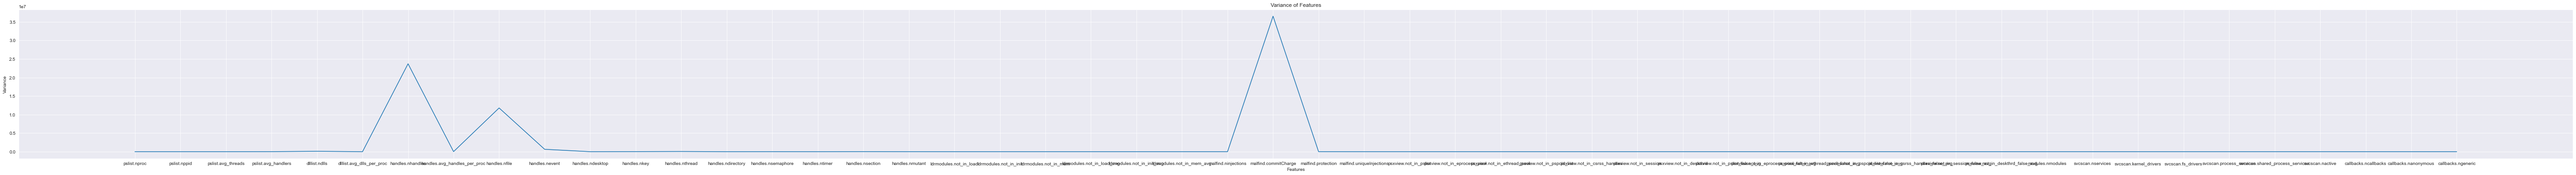

Index(['pslist.avg_handlers', 'dlllist.ndlls', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nfile', 'handles.nevent',
       'handles.nkey', 'handles.nthread', 'handles.nsemaphore',
       'handles.nsection', 'handles.nmutant', 'ldrmodules.not_in_load',
       'ldrmodules.not_in_init', 'malfind.commitCharge', 'malfind.protection'],
      dtype='object')


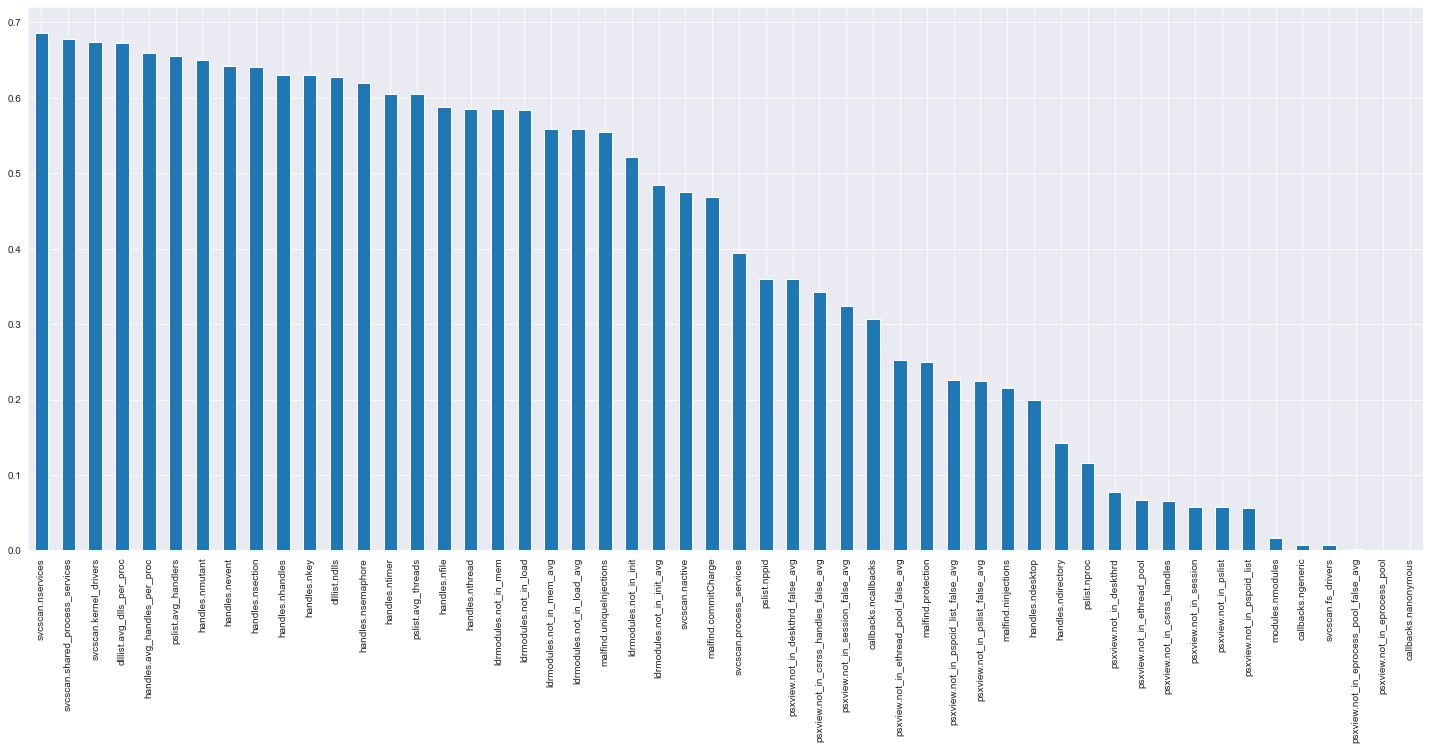

Index(['pslist.avg_threads', 'pslist.avg_handlers', 'dlllist.ndlls',
       'dlllist.avg_dlls_per_proc', 'handles.nhandles',
       'handles.avg_handles_per_proc', 'handles.nevent', 'handles.nkey',
       'handles.nsemaphore', 'handles.ntimer', 'handles.nsection',
       'handles.nmutant', 'svcscan.nservices', 'svcscan.kernel_drivers',
       'svcscan.shared_process_services'],
      dtype='object')


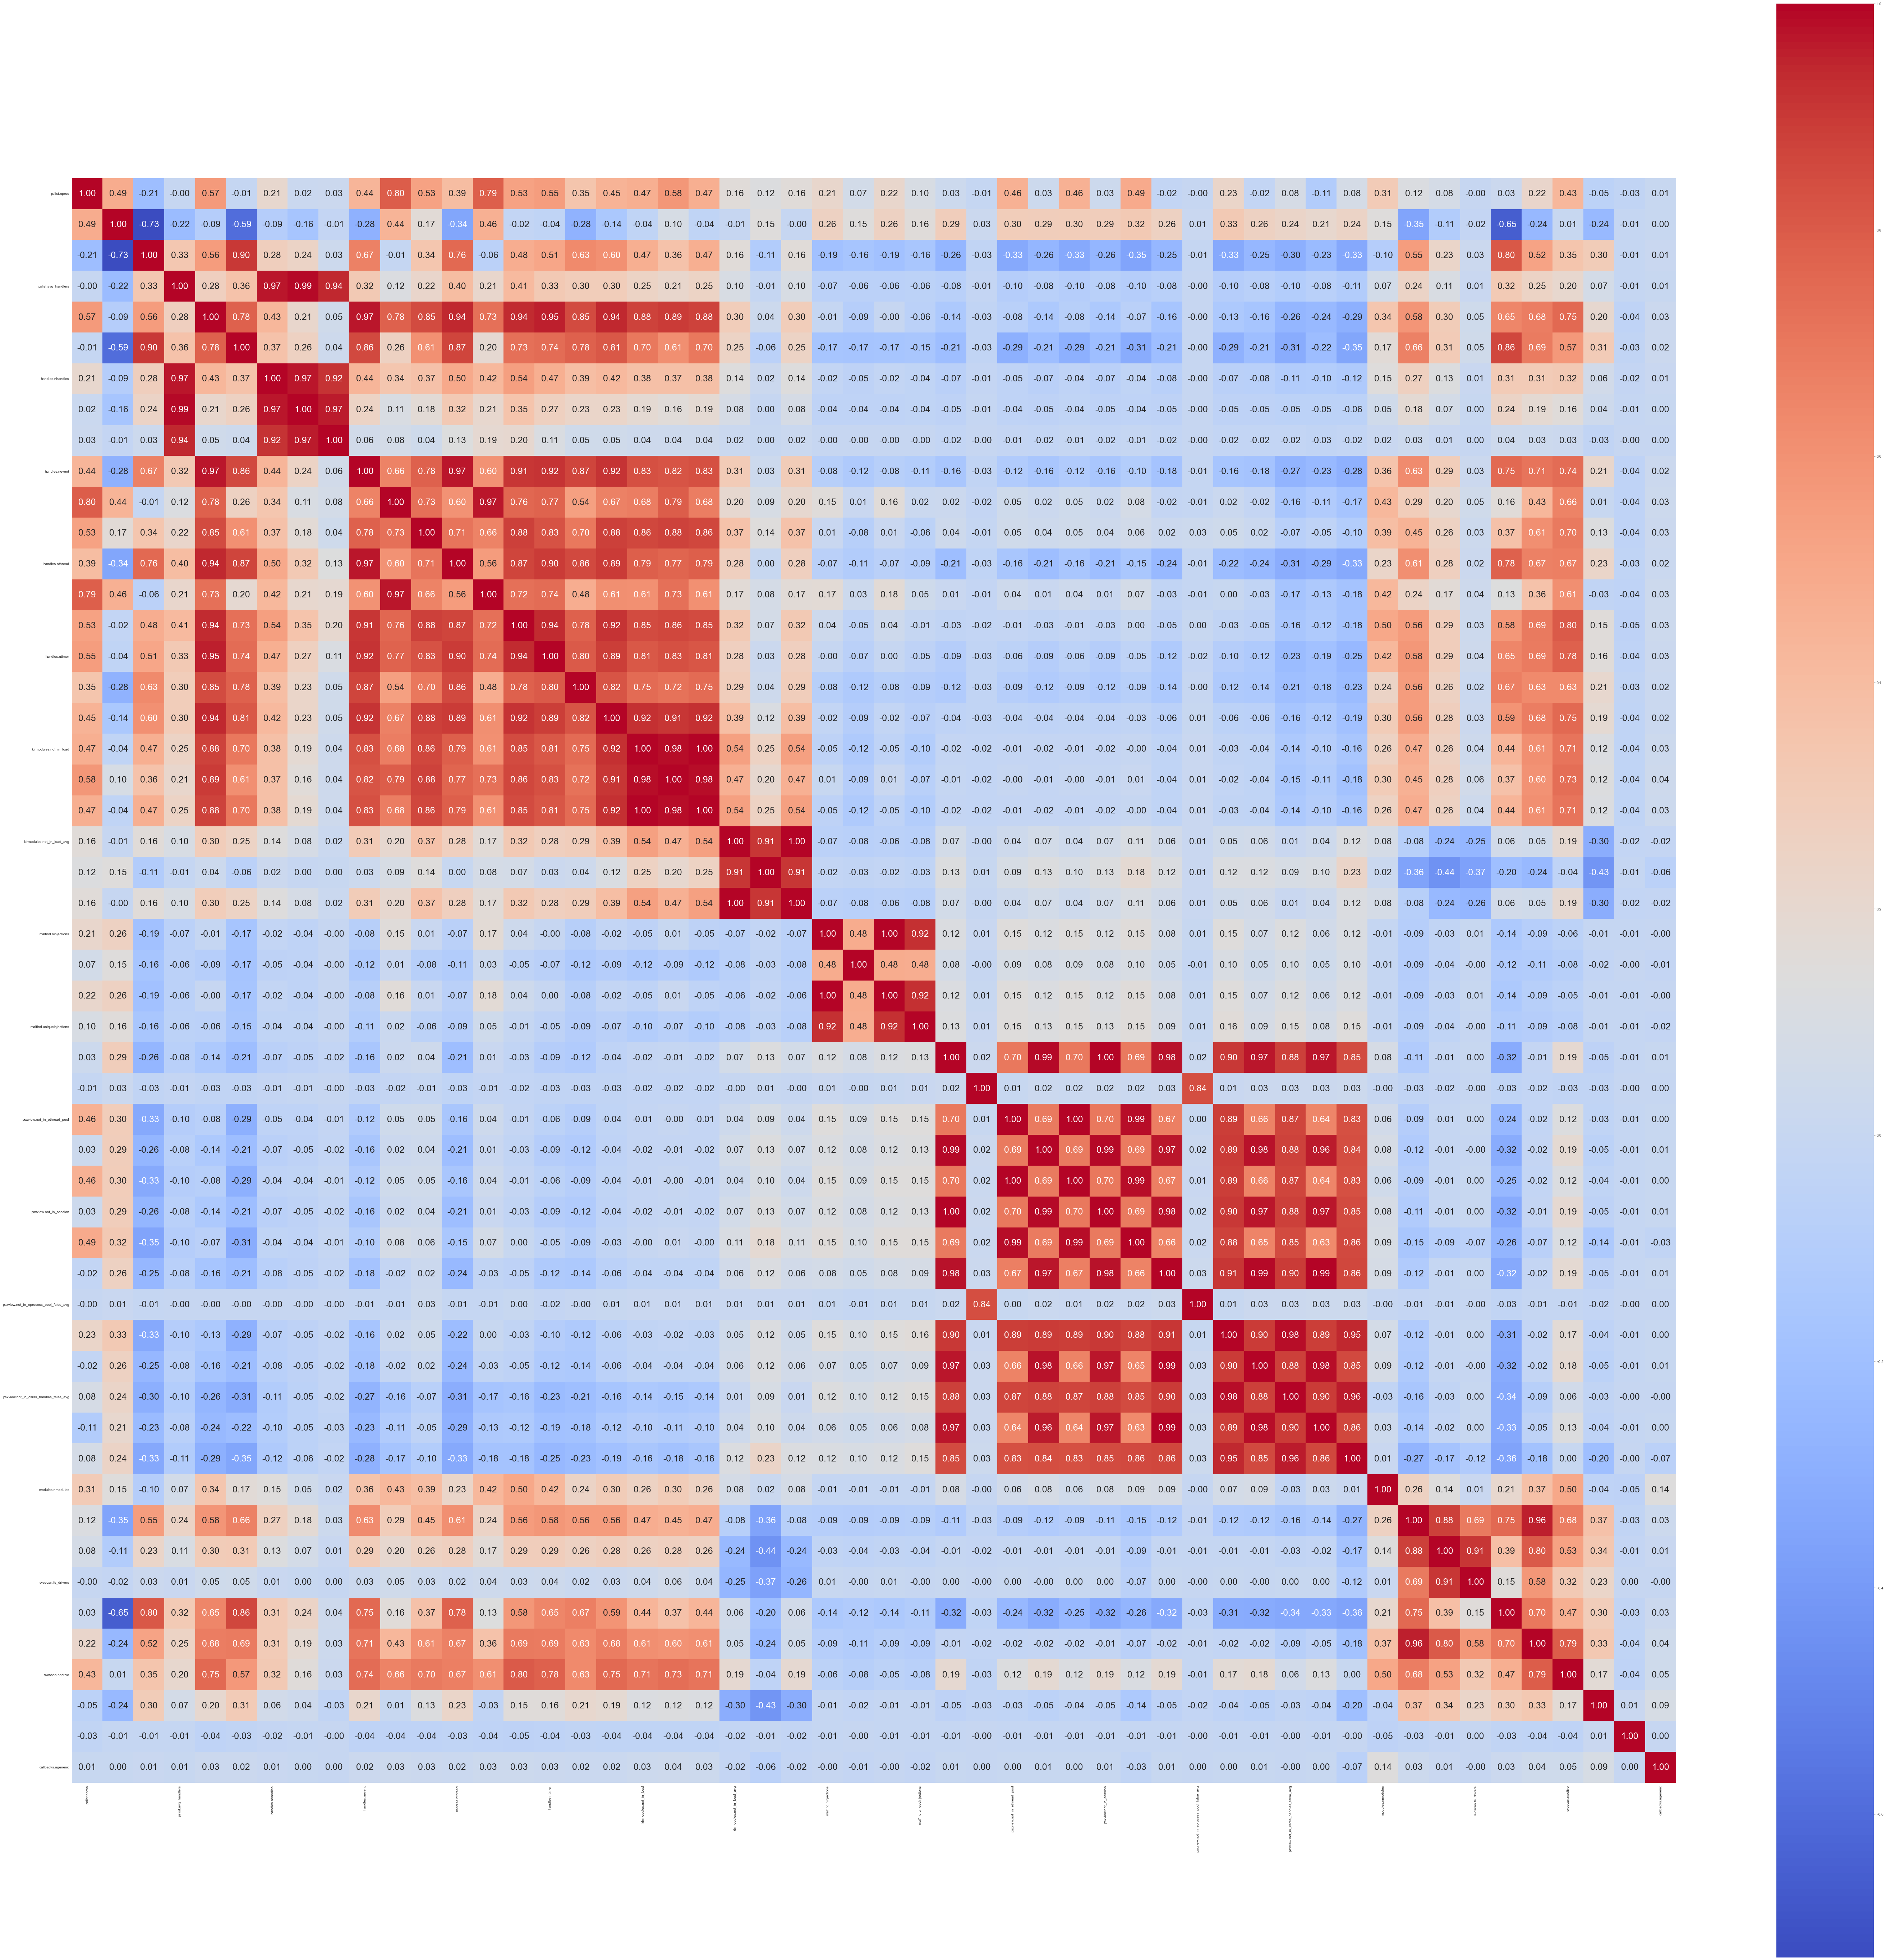

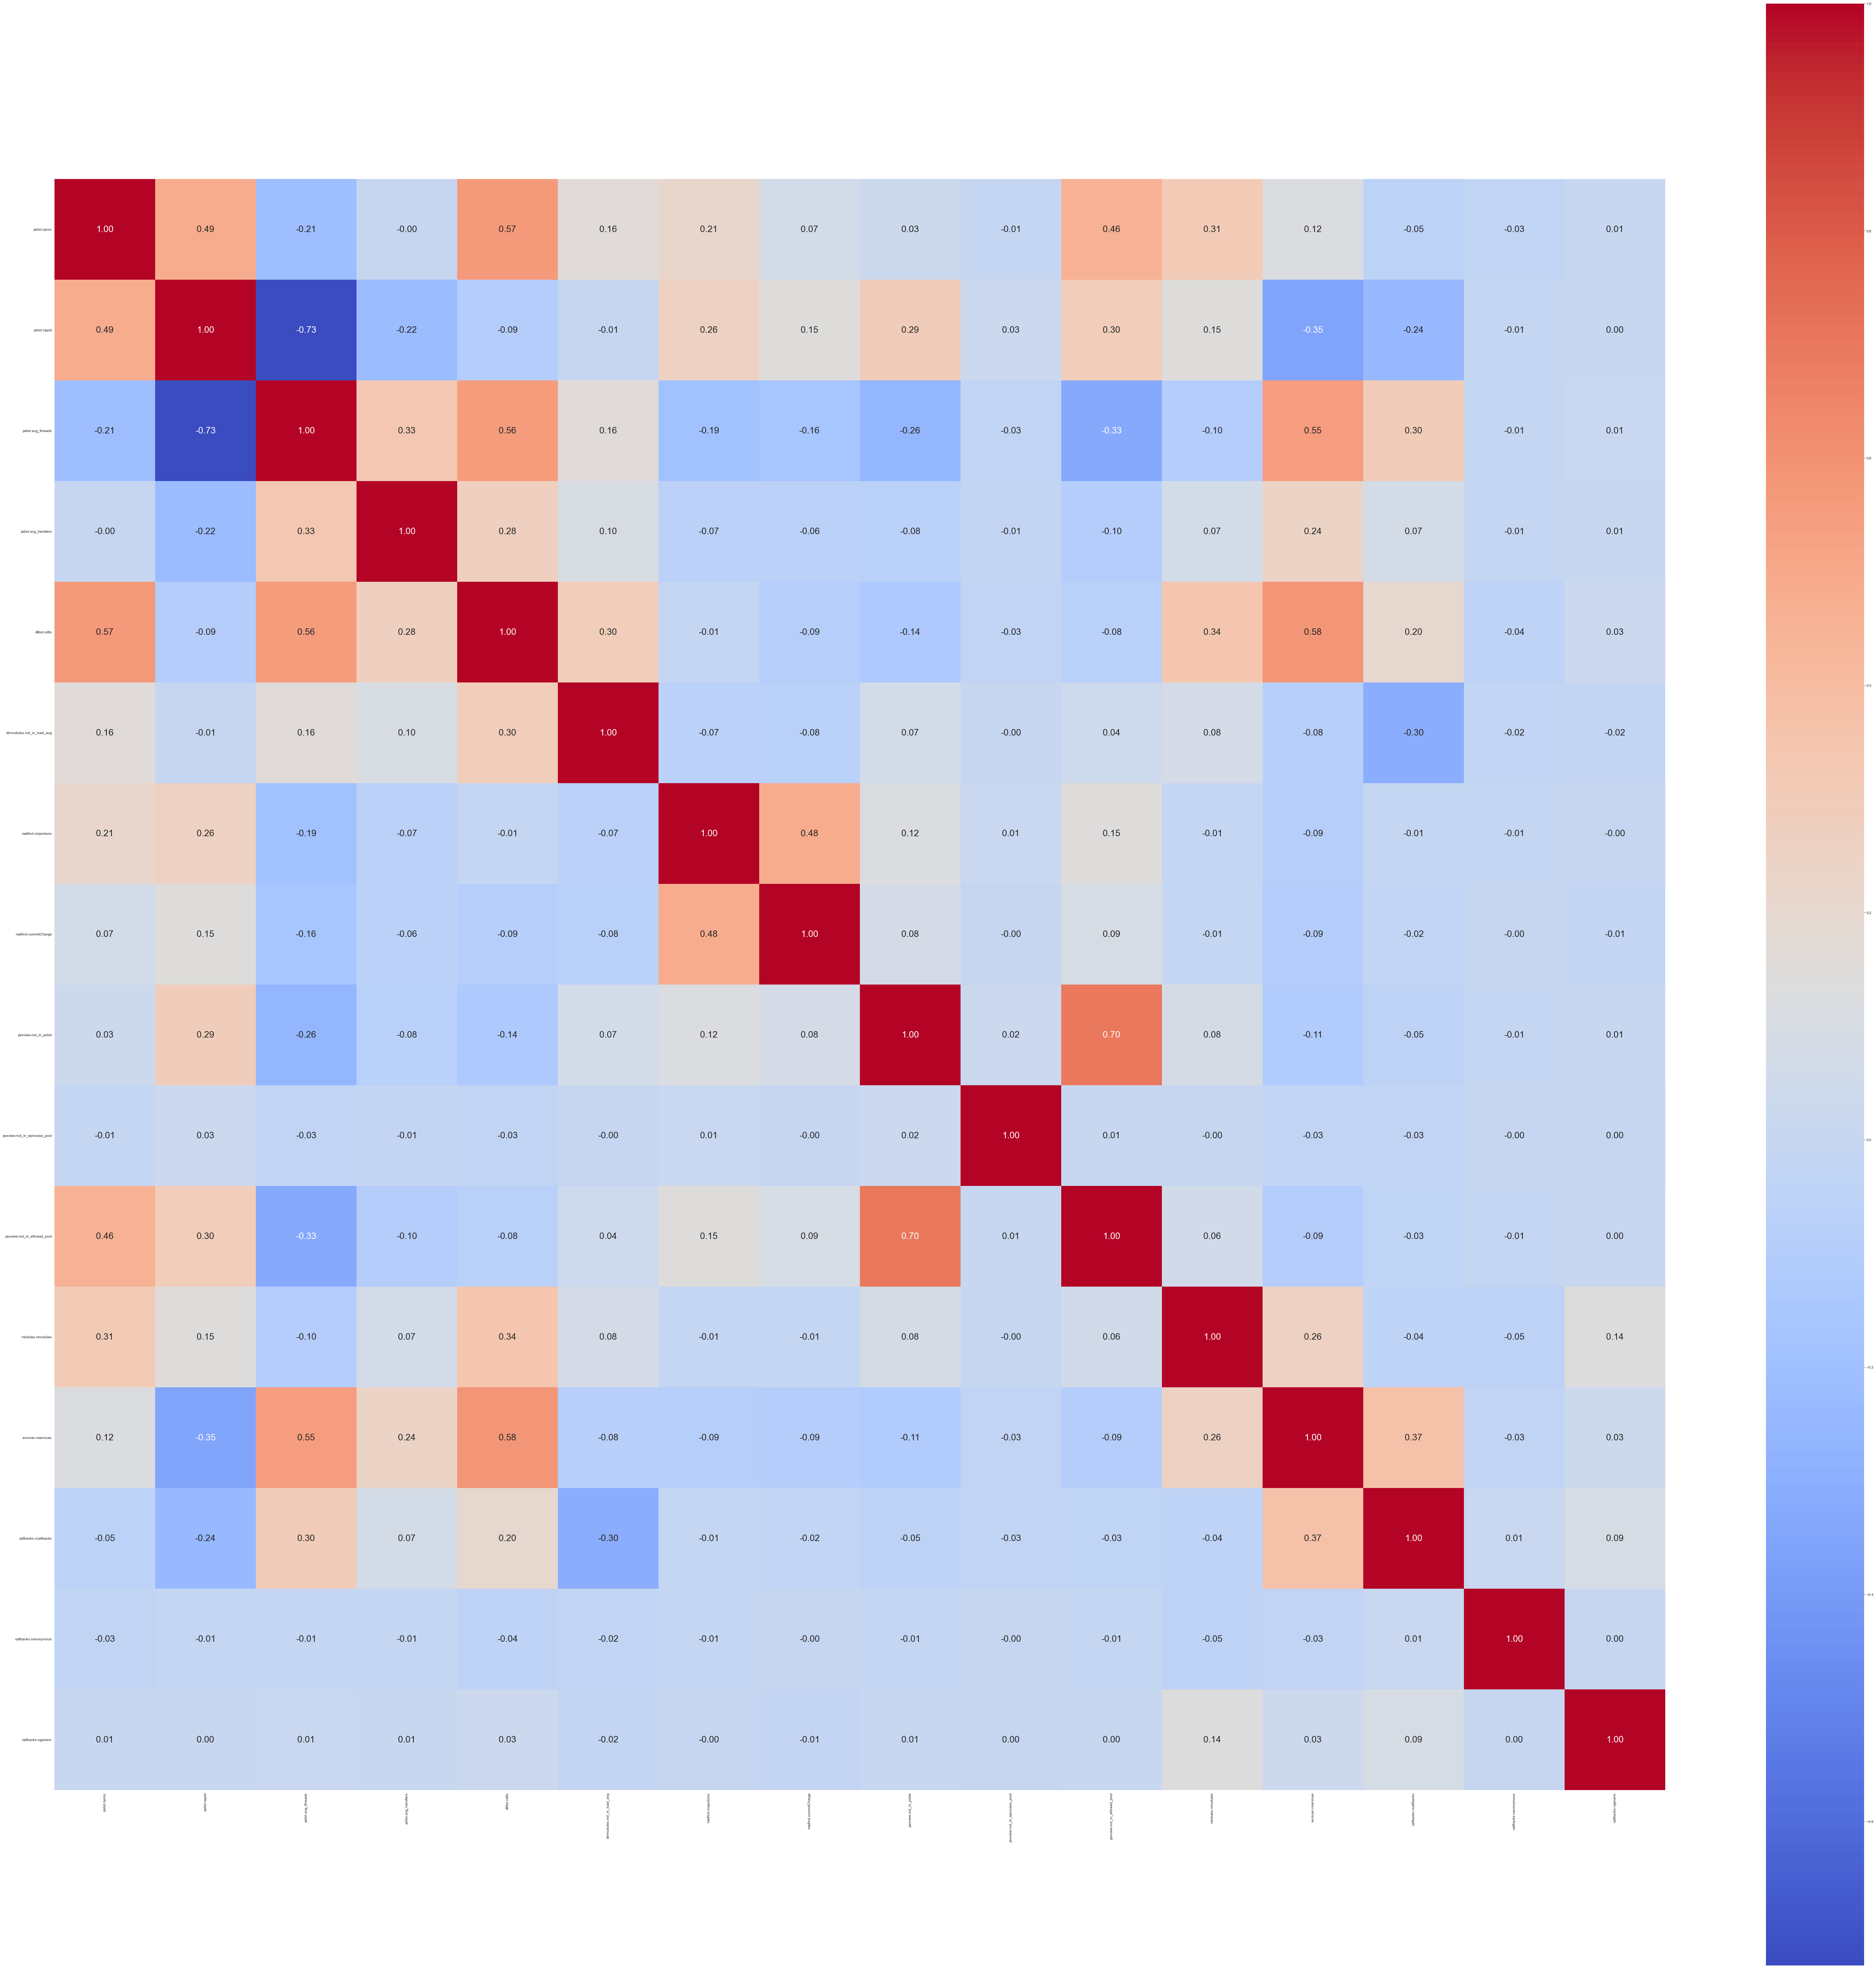

Index(['pslist.nproc', 'pslist.nppid', 'pslist.avg_threads',
       'pslist.avg_handlers', 'dlllist.ndlls', 'ldrmodules.not_in_load_avg',
       'malfind.ninjections', 'malfind.commitCharge', 'psxview.not_in_pslist',
       'psxview.not_in_eprocess_pool', 'psxview.not_in_ethread_pool',
       'modules.nmodules', 'svcscan.nservices', 'callbacks.ncallbacks',
       'callbacks.nanonymous', 'callbacks.ngeneric'],
      dtype='object')


In [14]:
#main
feature_selectors = ['no_feature_selection','var_threshold', 'info_gain_ratio', 'corr_threshold']
scores = []
for fs in feature_selectors:
    if fs == 'no_feature_selection':
        X_new = X
    else:
        selector = feature_selection_map[fs]
        X_new = selector(X, y)
    trained_model ,test_results = stacked_ensemble(X_new, y)
    

    # Append a trained model to selected_models
    scores.append({'name': fs} | trained_model | test_results)


In [15]:
#line plot scores
df_scores = pd.DataFrame(scores)


In [16]:
df_scores.head()

name  Accuracy  Train Sample  Average Training Time  \
0  no_feature_selection    0.9997         29298              42.600395   
1         var_threshold    0.9994         29298              26.987386   
2       info_gain_ratio    0.9994         29298              25.816658   
3        corr_threshold    0.9997         29298              20.142083   

   Average Score Time  Test Accuracy  Test Prediction Time  \
0            0.463839       0.999829              0.242029   
1            0.238559       0.999283              0.332676   
2            0.281264       0.999386              0.192645   
3            0.402875       0.999898              0.208044   

   Test Prediction Time/Sample  
0                     0.000008  
1                     0.000011  
2                     0.000007  
3                     0.000007

In [17]:
df_scores.to_csv('Data/no_val_results.csv', index=False)

In [18]:
#main
feature_selectors = ['no_feature_selection','var_threshold', 'info_gain_ratio', 'corr_threshold']
scores = []
for fs in feature_selectors:
    if fs == 'no_feature_selection':
        X_new = X
    else:
        selector = feature_selection_map[fs]
        X_new = selector(X, y)
    trained_model ,test_results = stacked_ensemble(X_new, y)
    

    # Append a trained model to selected_models
    scores.append({'name': fs} | trained_model | test_results)

In [ ]:
#line plot scores
df_scores = pd.DataFrame(scores)

In [ ]:
df_scores.head()

In [ ]:
df_scores.to_csv('Data/no_val_results1.csv', index=False)

In [ ]:
df_scores.set_index('name', inplace=True)

In [ ]:
df_scores

In [ ]:
to_plot = df_scores.copy(deep=True)

to_plot.drop(labels=["Train Sample",
                              "Test Accuracy",
                              "Accuracy",
                              "Test Prediction Time",
                              "Average Training Time"], axis=1, inplace=True)

In [ ]:


to_plot.plot(kind='line', figsize=(8, 8))
plt.show()


In [ ]:
#plot change in time for each feature selection method
ax = df_scores.plot(kind='bar', figsize=(10, 50), subplots=True)
plt.show()

In [ ]:
# #plot score time per name using seaborn
# #size of plot
# plt.figure(figsize=(10, 10))
# ax = sns.barplot(x=df_scores.index, y=df_scores['Score Time'])
# ax.set(xlabel='Feature Selection Method', ylabel='Score Time (s)')

# #label each bar with score
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# plt.show()


In [ ]:
# #plot fit time per name using seaborn
# plt.figure(figsize=(10, 10))
# ax = sns.barplot(x=df_scores.index, y=df_scores['Fit_time'])
# ax.set(xlabel = 'Feature Selection Method', ylabel = 'Fit Time (s)')

# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')


In [ ]:
# #score time vs accuracy plot
# plt.figure(figsize=(10, 10))
# ax = sns.barplot(x=df_scores.index, y=df_scores['Accuracy'])
# ax.set(xlabel = 'Feature Selection Method', ylabel = 'Accuracy')

# #label each bar with score
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')
# plt.show()


In [ ]:
# #plot prediction time per name using seaborn
# plt.figure(figsize=(10, 10))
# ax = sns.barplot(x=df_scores.index, y=df_scores['Predict Time'])
# ax.set(xlabel = 'Feature Selection Method', ylabel = 'Prediction Time (s)')
# #label each bar with score
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.4f'), (p.get_x() + p.get_width() / 2., p.get_height()),
#                 ha='center', va='center', xytext=(0, 10), textcoords='offset points')